<a href="https://colab.research.google.com/github/sherjahong1r/my-data-sayns-lessons/blob/main/05_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heatmap**

# **Issiqlik xaritasi degan ma'noni anglatadi**

In [316]:
import pandas as pd
import numpy as np

In [317]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [318]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, usecols=[0,1])
df.head()
# parse_dates=[0] metodini qo'shganimizda DatetimeUndex bo'lardi,
# ammo hozir qo'shmaganimiz uchun shunchaki Index bo'lib turibdi.

# usecols=[0,1] parametri pd.read_csv funksiyasida CSV faylidan ma'lum ustunlarni yuklash uchun ishlatiladi.
# Bu yerda [0,1] 2-ta yani Data va Avila Adobe ustunlari chaqirildi.

# index_col=0 esa 0-indeksda turgan ustunni index qiladi yani bu yerda Data ustuni index bo'ldi

# Avila Adobe ustunida Date sanasidagi unga qilingan tashriflar soni ko'rsatilgan

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [319]:
df.shape

(59, 1)

In [320]:
type(df.index)
# Bunga qarasak Index bo'lib turibdi yani oddiy sonlar deb qabul qilayabdi Date ustunidagi sanalarni

pandas.core.indexes.base.Index

In [321]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df.head()
# Bunda parse_dates=[0] metodidan foydalandik.

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [322]:
type(df.index)
# Yuqorida parse_dates=[0] bo'lgani uchun endi uning type DatetimeIndex ga o'zgardi

pandas.core.indexes.datetimes.DatetimeIndex

In [323]:
df['month'] = [i.month for i in df.index]
df.head()
# yangi month ustuni yaratildi, df.index dan bitta i ni yani month ni ajratib olyabdi.
# agar i.month emas, i.year qilganimizda yillarni ajrtaib olardi.

,Avila Adobe,month
Date,,
2014-01-01,24778,1
2014-02-01,18976,2
2014-03-01,25231,3
2014-04-01,26989,4
2014-05-01,36883,5


In [324]:
df['year'] = [i.year for i in df.index]
df.head()
# year ustuni yaratildi.

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [325]:
# df['day'] = [i.day for i in df.index]
# df.head()
# # day ustuni qo'shildi.

In [326]:
df2 = df.groupby(['month', 'year']).max()
df2.head(12)
# bunda groupby bilan 2 ta indexli yani month va year degan df2 yaratildi

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718
3     2014        25231
      2015        21297

In [327]:
df2.unstack(level=0)
# unstack bilan level=0 yani year ni qator, month ni esa ustun qilib oldik
# agar level=1 qilsak buning aksi bo'ladi.

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

In [328]:
df2.unstack(level=1)

Avila Adobe                                    
year         2014     2015     2016     2017     2018
month                                                
1         24778.0  20438.0  19659.0  18792.0  16265.0
2         18976.0  15578.0  17378.0  14035.0  14718.0
3         25231.0  21297.0  20322.0  20680.0  19001.0
4         26989.0  26670.0  24521.0  25234.0  18966.0
5         36883.0  34383.0  31728.0  30029.0  25173.0
6         29487.0  30569.0  23696.0  22169.0  22171.0
7         32378.0  41242.0  31689.0  30831.0  23136.0
8         37680.0  30700.0  25987.0  27009.0  20815.0
9         28473.0  20967.0  22897.0  23403.0  21020.0
10        27995.0  29764.0  25040.0  22164.0  19280.0
11        25691.0  24483.0  17760.0  17629.0  17163.0
12        18754.0  21426.0  20107.0  18339.0      NaN

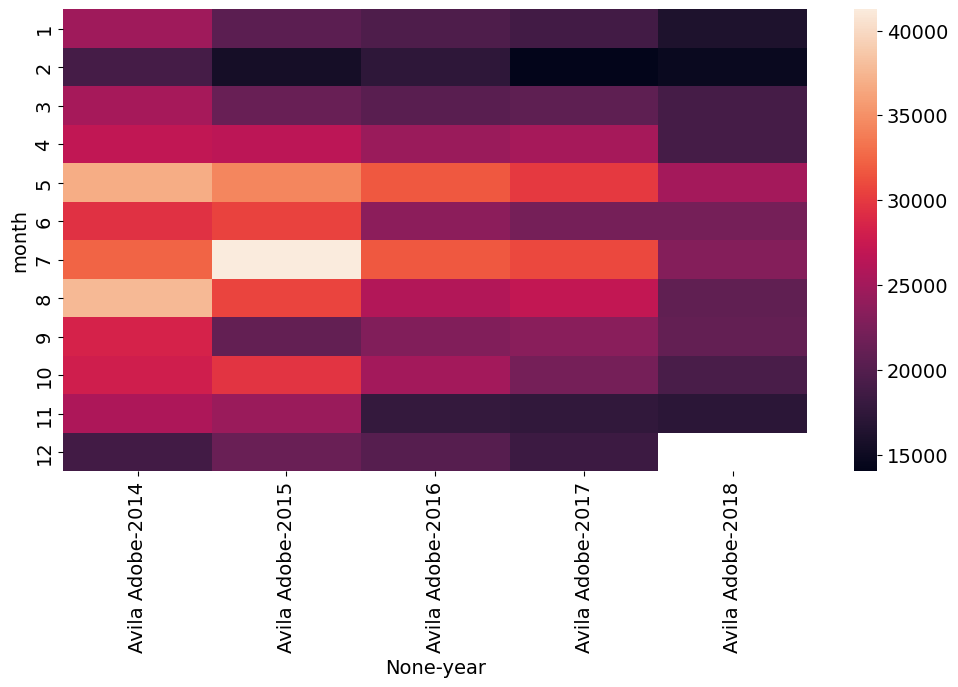

In [329]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=1))
plt.show()
# bu heatmap yani issiqlik grafigi deyiladi.
# Bu yerda data ga yuqoridagi unstack qilingan codlar qatorini uzatayabmiz
# shunda bu yuqoridagi jadvalning issiqlik xaritasi yani month qator va year ustun bo'lgan jadval.

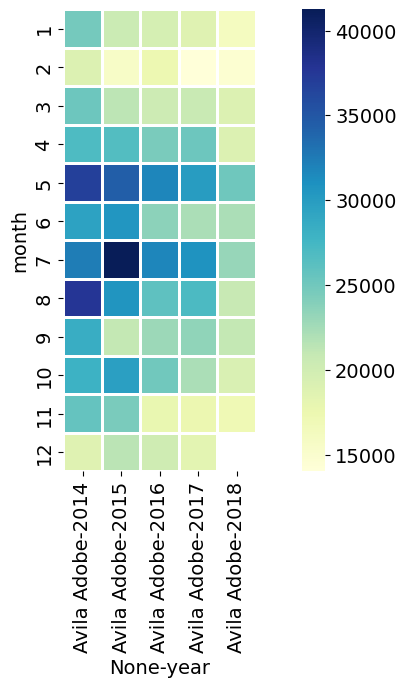

In [330]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=1), cmap='YlGnBu', linewidths=1, square=True)
plt.show()

# cmap='YlGnBu'  bu ranglar shunday ranglardan foydalanilgan
# linewidths=1   bu katalar yani ranglar orasi chiziq bilan ajratiladi
# square=True    bu bilan square yani to'rtburchakli ranglar bo'ladi
# hamda level=1 bunda oylar qator va yillar ustun bo'lyabdi

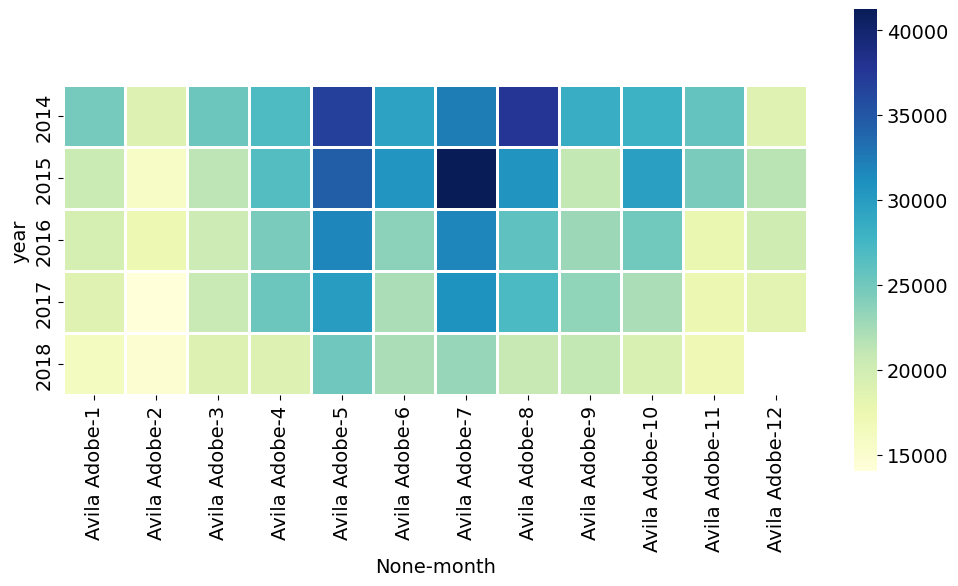

In [331]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=0), cmap='YlGnBu', linewidths=1, square=True)
plt.show()
# Bunda esa level=0 qildik yani yillar qator va oylar ustun bo'ladi tushunarliroq ko'rinishi

# Avila Adobe ustunida Date sanasidagi unga qilingan tashriflar soni ko'rsatilgan
# agar rang qanchalik to'q bo'lsa unga tashriflar soni ham ko'p bo'lgan bo'ladi, rang och bo'lsa aksi.

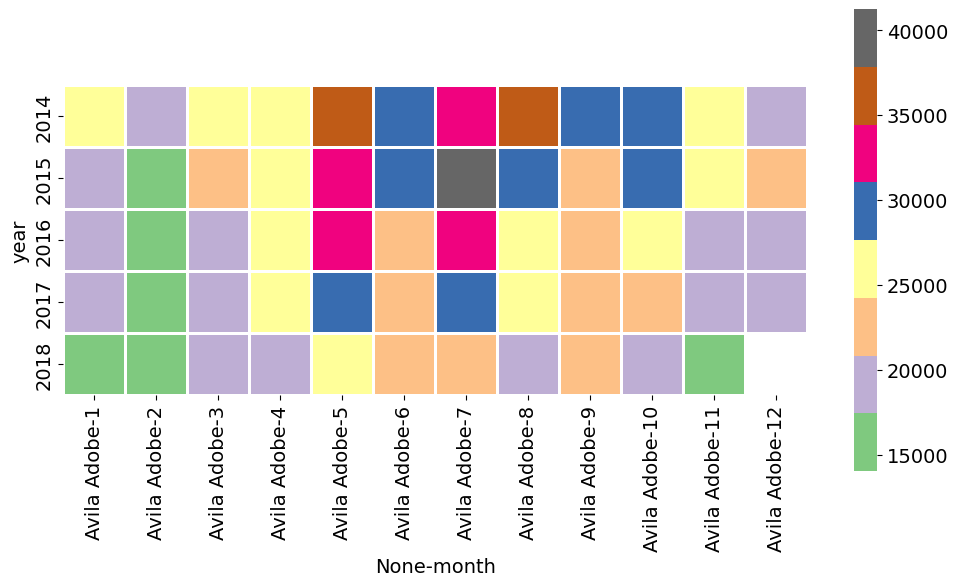

In [332]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=0), cmap='Accent', linewidths=1, square=True)
plt.show()
# Bunda boshqa rangdan yani Accent dan foydalandik

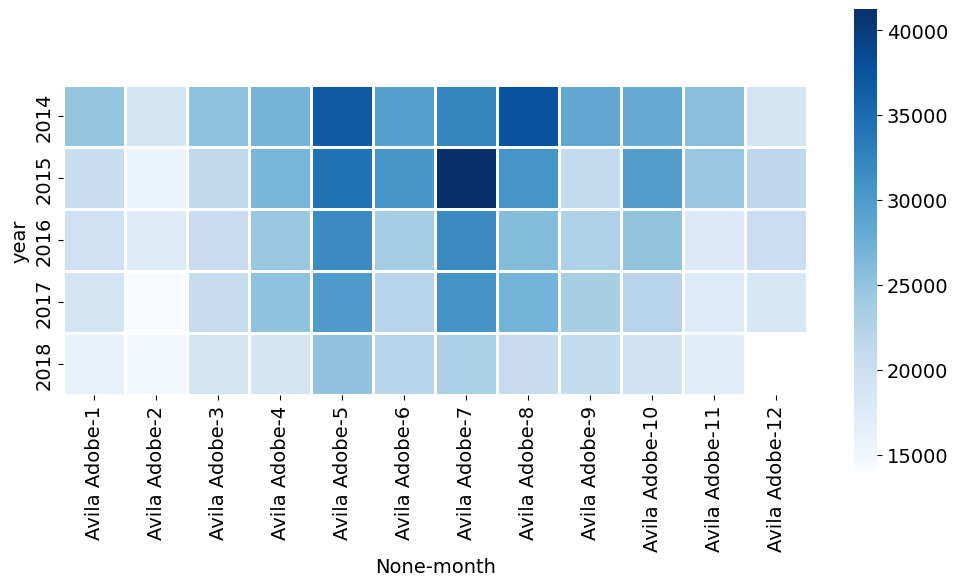

In [333]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=0), cmap='Blues', linewidths=1, square=True)
plt.show()

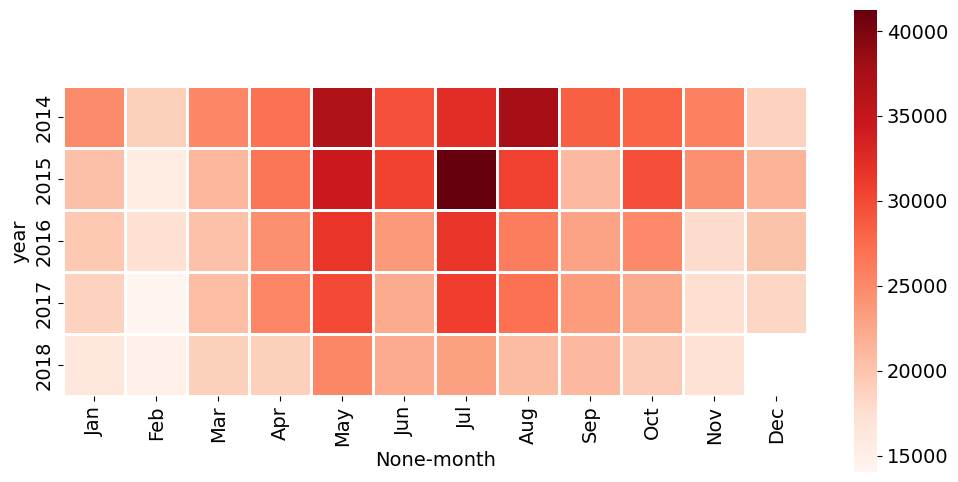

In [334]:
# Yuqoridagi grafiklarda oy nomlar Avila Adobe-1 va h.k deb ketilgan
# pastdagi codlar yordamida buni oy nomi qiymatlariga o'zgartirildi.

plt.figure(figsize=(12,6))
sns.heatmap(data=df2.unstack(level=0), cmap='Reds', linewidths=1, square=True)
xticks_labels = ['Jan','Feb','Mar','Apr','May','Jun',
                 'Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show()

# **NEW SECTION**

# **Foydalanish uchun qo'shimcha ranglar**

Matplotlib va Seaborn kutubxonalarida ko'plab rang sxemalari (colormaps) mavjud. Ular odatda quyidagi toifalarga bo'linadi:

**Perceptual (Idrok etiladigan):** Bu rang sxemalari ma'lumotlarning qiymatini yaxshi aks ettiradi va odatda bir rangdan boshqa rangga silliq o'tadi.
* `viridis`, `plasma`, `inferno`, `magma`, `cividis`

**Sequential (Ketma-ket):** Bitta rangning to'yinganligi yoki yorqinligi o'zgarishi bilan ma'lumotlarning o'sishini yoki kamayishini ko'rsatadi. Odatda past qiymatlardan yuqori qiymatlarga qarab rang o'zgaradi.
* `Greys`, `Purples`, `Blues`, `Greens`, `Oranges`, `Reds`
* `YlOrRd`, `YlGnBu`, `BuPu`, `GnBu`, `PuBuGn`

**Diverging (Farqlanuvchi):** Ikki xil rang bilan o'rtacha nuqtadan (odatda oq yoki kulrang) ikki tomonga farqlanishni ko'rsatadi. Bu o'rtacha qiymatdan yuqori va past qiymatlarni taqqoslash uchun foydali.
* `PiYG`, `PRGn`, `BrBG`, `PuOr`, `RdGy`, `RdBu`, `RdYlBu`, `RdYlGn`, `Spectral`, `coolwarm`, `bwr`, `seismic`

**Qualitative (Sifatli):** Bir-biridan keskin farq qiluvchi ranglarni taqdim etadi, bu toifali ma'lumotlarni ajratish uchun foydalidir.
* `Pastel1`, `Pastel2`, `Paired`, `Accent`, `Dark2`, `Set1`, `Set2`, `Set3`, `tab10`, `tab20`, `tab20b`, `tab20c`

**Matplotlib colormap sahifasidan to'liq ro'yxatni ko'rishingiz mumkin:** [https://matplotlib.org/stable/users/explain/colors/colormaps.html](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

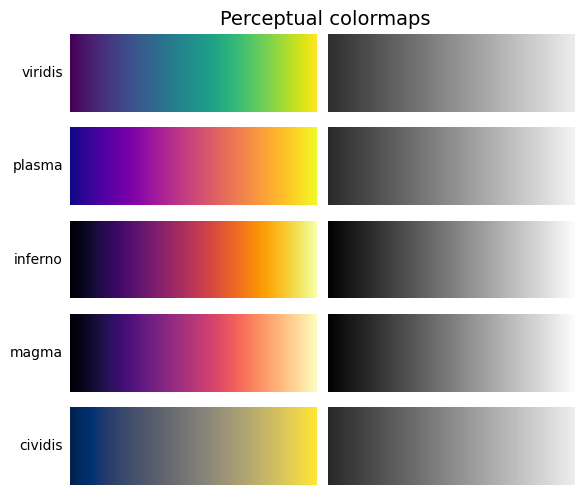

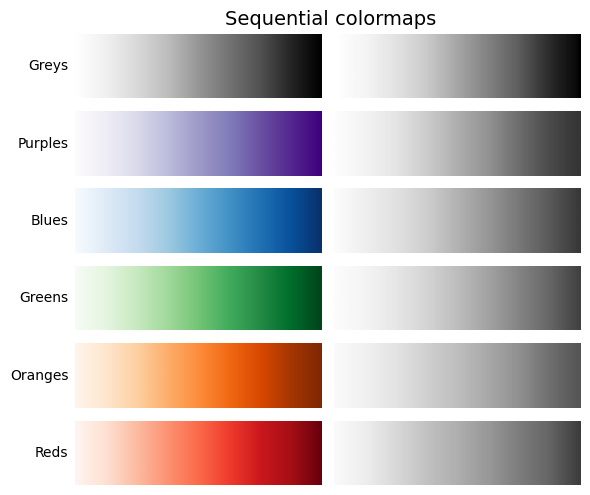

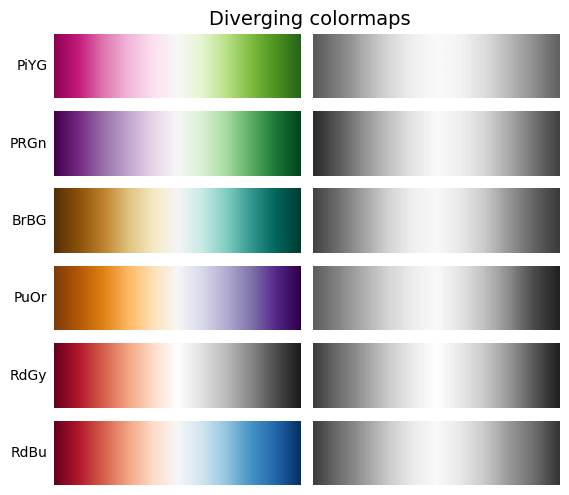

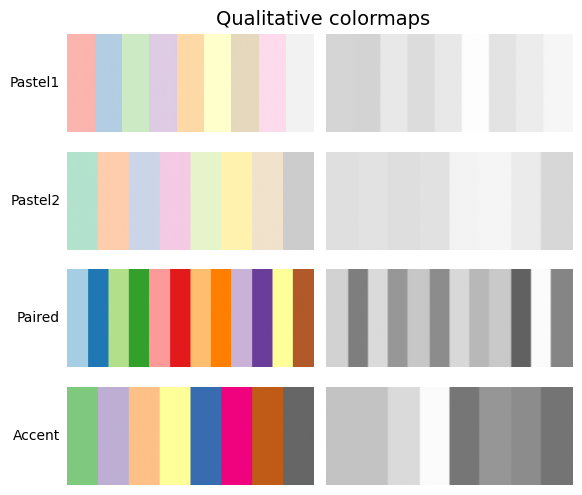

In [335]:
!pip install colorspacious
import matplotlib as mpl
from colorspacious import cspace_converter

mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()

# The 'cmaps' variable is not defined in the current notebook state.
# I'll add a placeholder for it, assuming it's meant to categorize colormaps.
# You might need to adjust this based on the original source of this code.
cmaps = {
    'Perceptual': ['viridis', 'plasma', 'inferno', 'magma', 'cividis'],
    'Sequential': ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds'],
    'Diverging': ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu'],
    'Qualitative': ['Pastel1', 'Pastel2', 'Paired', 'Accent']
}

for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)

# **cmap uchun mavjud ranglar:**

[‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’, ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’, ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’, ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’, ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’, ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’]

# **NEW SECTION**

# BONUS.
## Guruhlangan ustunli grafiklar.

In [343]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


In [342]:
df.shape

(12, 15)

Yuqoridagi jadval turli oylarda turli aviakompaniyalarga tegishli samolyotlar  o'rtacha necha minutga kechikkani ko'rsatilgan**<sup>*</sup>** (har bir ustun bu aviakompaniya nomi qisqartmasi).

<sub>*manfiy qiymat samolyot erta kelganini anglatadi.</sub>

Biz alohida aviakompaniya uchun oyma-oy qiymatlarni ustunli grafik ko'rinishida chiqarishimiz mumkin:

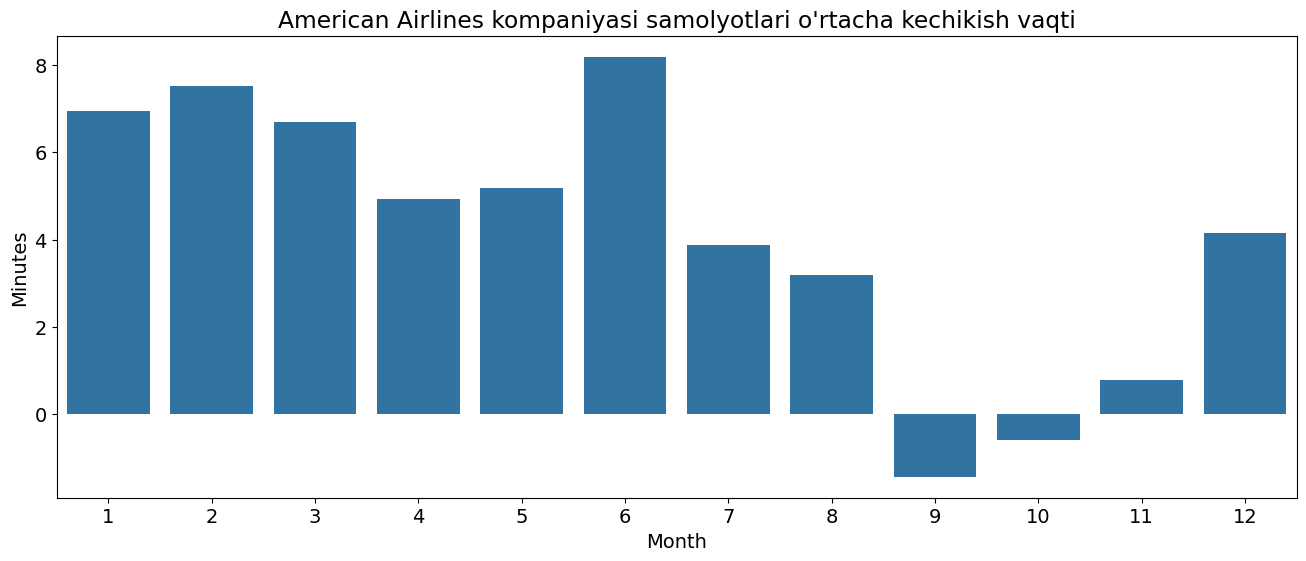

In [337]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Month'], y=df['AA'])
plt.title("American Airlines kompaniyasi samolyotlari o'rtacha kechikish vaqti")
plt.ylabel("Minutes")
plt.show()
# Month ni x o'qiga gorizontaliga qo'yildi hamda ustunlar AA kompaniyasiga tegishli
# minutga kechikishi yoki erta kelishi ifodalangan

Keling endi bir nechta aviakompaniyalarni yonma-yon solishtiramiz. Buning uchun jadvalimizni shakl o'zgartirishimiz kerak.

`Pandas`da df shaklini o'zgratirish uchun `reshape` yoki `melt` funksiyasidan foydalanishimiz mumkin.

`melt` funksiyasi jadvlani eniga uzundan bo'yiga uzun holatga olib kelishda qo'llaniladi. Bunda df dagi bir nechta ustunlarni yagona `variable` ustuniga keltirish mumkin. Qiymatlar esa har bir `variable` uchun `value` ustunida ko'rsatiladi.

Tushunarli bo'lishi uchun quyidagi misolga ahamiyat bering. Bu misolda biz AA va MQ aviakompaniyalari uchun ma'lumotlarni ajratib olganmiz.

![](https://i.imgur.com/t9GxYtQ.png)



Guruhlangan ustunli grafik chizish uchun `catplot` metodidan foydalanamiz. `catplot` yordamida turli grafiklar chizish mumkin, shuning `kind='bar'` parametri yordamida aynan `bar` grafik chizmoqchi ekanmizni ko'rsatamiz.

So'ngra, `x` va `y` o'qi qiymatlarini ko'rsatamiz va eng muhimi guruhlash qaysi ustun bo'yicha bo'lishini ko'rsatish uchun `hue='variable'` parametridan foydalanmiz

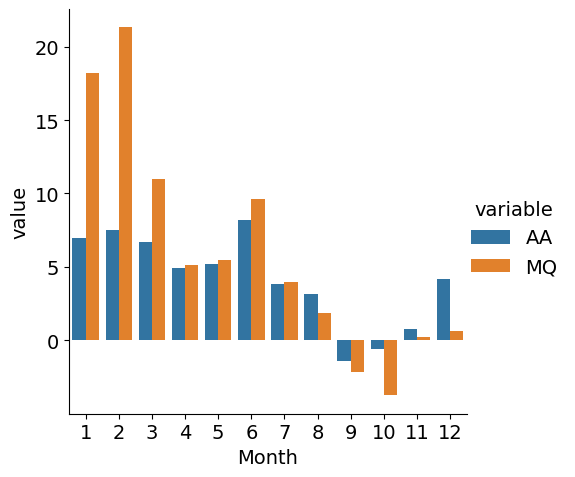

In [338]:
data = df.melt(id_vars="Month", value_vars=['AA', 'MQ'])
sns.catplot(data=data, kind="bar", x="Month", y="value", hue="variable")
plt.show()
# Ikkta kompaniya grafigi

In [339]:
data = pd.melt(df, id_vars=['Month'], value_vars=['AA', 'AS', 'DL', 'WN', 'MQ'])
data.head()

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878


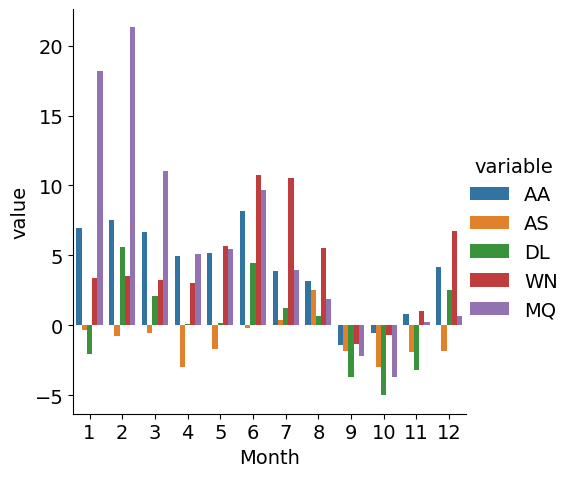

In [340]:
sns.catplot(data=data, kind="bar", x="Month", y="value", hue="variable")
plt.show()
# Bunda 5 kompaniya grafigi shakllantirildi

Ko'rib turganingizdek, bunday grafikni tushunish o'ziga yarasha qiyinchilik tug'diradi, bu yerda bizga yana `heatmap` grafigi yordamga keladi:

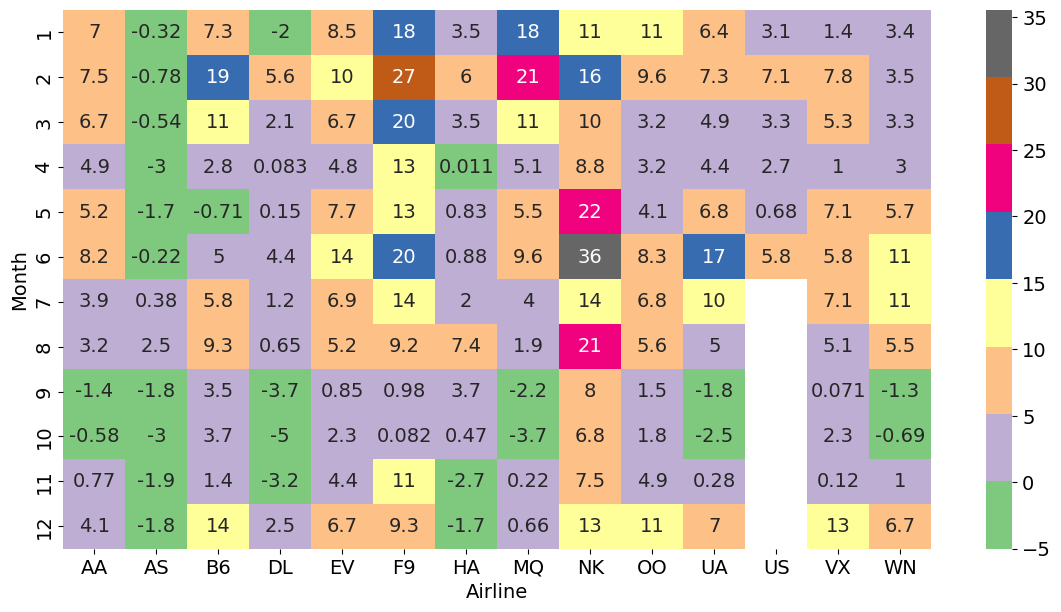

In [341]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.set_index('Month'), cmap="Accent", annot=True)
plt.xlabel("Airline")
plt.show()
# Bu jadval grafigi tushinarliroq bo'ldi.
# dataga df jadvalini uzatdik, set_index('month) indexga month ustunini qo'ydik
# cmap="Accent"    bu rangi
# annot=True parametri seaborn.heatmap() funksiyasida grafikdagi har bir katakchada
# ma'lumotlarning qiymatini ko'rsatish uchun ishlatiladi.
# Agar siz uni False qilsangiz, raqamlar ko'rsatilmaydi va faqat ranglar orqali ma'lumotlar ifodalanadi.

### `pandas.melt()` haqida ko'proq ma'lumot: https://pandas.pydata.org/docs/reference/api/pandas.melt.html